## Final Project Submission

Please fill out:
* Student name: Joshua Ruggles
* Student pace: **self paced** / part time / full time
* Scheduled project review date/time: 
* Instructor name: Joe Comeaux
* Blog post URL:


# King County Housing Data

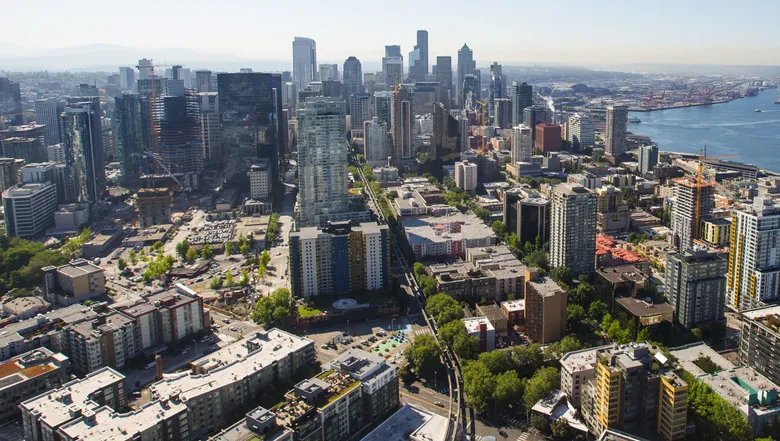

## Business Problem


King County is having a housing crisis! 
    
Okay, well not really. We have been asked by a real estate agency in the area to build a predictive model for the King County housing market; the agency's directive is to establish locations in King County that will return the most investment and have the most profitable features. 
****************

## Raw data 

In [1]:
# Let's reacquaint ourselves with the data. 

import pandas as pd 
df = pd.read_csv('data/kc_house_data.csv')
df7 = df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
from statsmodels.formula.api import ols

In [4]:
# Let's preview the model with all columns that are integers or numbers. Since we are building new homes, we do not need to 
# know anything about yr_built or yr_renovated
outcome = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'zipcode', 'sqft_living15', 
            'sqft_lot15']
predictors = '+'.join(features)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2664.
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:59:56   Log-Likelihood:            -2.9932e+05
No. Observations:               21597   AIC:                         5.987e+05
Df Residuals:                   21587   BIC:                         5.987e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.357e+07   3.39e+06    -18.764      0.000   -7.02e+07   -5.69e+07
bedrooms      -5.573e+04   2334.686    -23.869      0.000   -6.03e+04   -5.12e+04
bathrooms      9412.5381   3814.279      2.468      0.014    1936.270    1.69e+04
sqft_living     295.6612      5.191     56.957      0.000     285.486     305.836
sqft_lot          0.0826      0.060      1.376      0.169      -0.035       0.200
floors         7284.0554   4313.733      1.689      0.091   -1171.179    1.57e+04
sqft_above      -33.5808      5.216     -6.438      0.000     -43.804     -23.357
zipcode         647.9975     34.527     18.768      0.000     580.322     715.673
sqft_living15    84.9082      4.023     21.103      0.000      77.022      92.794
sqft_lot15       -0.7781      0.092     -8.485      0.000      -0.958      -0.598
==============================================================================
Omnibus:                    15342.411   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           657137.031
Skew:                           2.924   Prob(JB):                         0.00
Kurtosis:                      29.383   Cond. No.                     1.98e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-info">
Just having taken a glance at the data we can tell a few things: 
    <br><br>
    -There are categorical values in the dataset
    <br><br>
    -There is skew; we will need to normalize this data prior to creating our predictive model
    <br><br>
    -There is multicollinearity
</div>

## Multicollinearity

In [5]:
# Based on the information so far, we are interested in finding what affects the 'price' of a home. Let's separate 
# categorical columns from numerical columns. 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


af = df.corr()
af

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


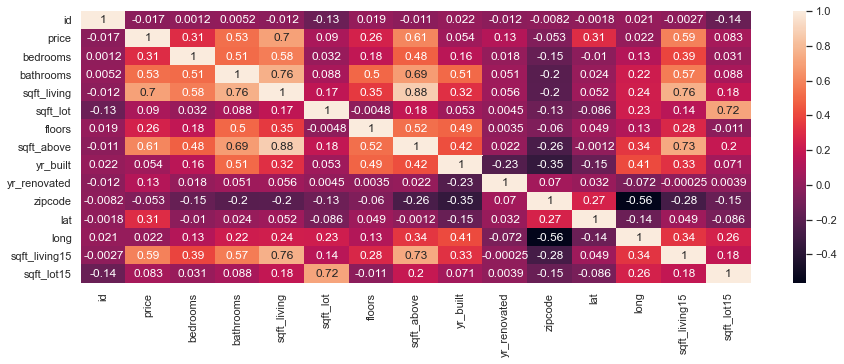

In [6]:
sns.set(rc = {'figure.figsize': (15,5)})
sns.heatmap(af, annot = True);

<div class= "alert alert-block alert-info">Based on the correlation, the column 'price' seems to be most affected by 'sqft_living'. </div>

In [7]:
abs(af) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [8]:
df2 = af.abs().stack().reset_index().sort_values(0, ascending=False)

df2['pairs'] = list(zip(df2.level_0, df2.level_1))

df2.set_index(['pairs'], inplace = True)

df2.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df2.columns = ['cc']

df2.drop_duplicates(inplace=True)

df2[(df2.cc>.75) & (df2.cc<1)]


,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758


In [9]:
first = 'sqft_living'
second = 'sqft_above'
price = 'price'

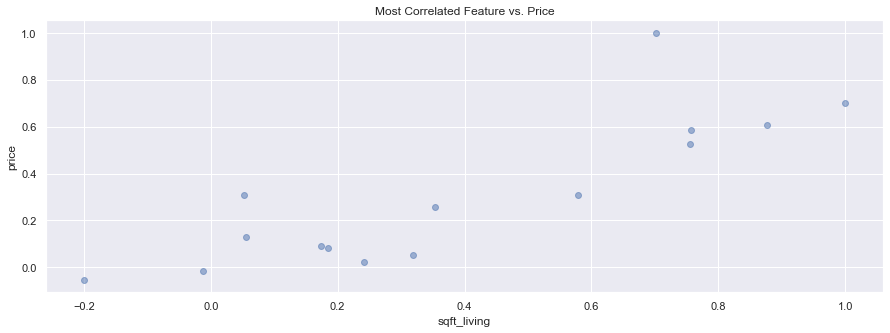

In [10]:

fig, ax = plt.subplots()

ax.scatter(af['sqft_living'], af['price'], alpha=0.5)
ax.set_xlabel('sqft_living')
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Price");

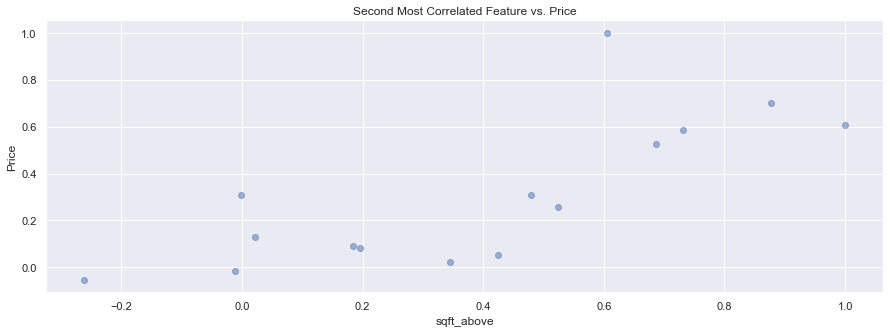

In [11]:
fig, ax = plt.subplots()

ax.scatter(af['sqft_above'], af['price'], alpha=0.5)
ax.set_xlabel('sqft_above')
ax.set_ylabel("Price")
ax.set_title("Second Most Correlated Feature vs. Price");

<div class="alert alert-block alert-info">
The two columns that are most associated with our target, price are sqft_living and sqft_above. Currently, our business recommendation would be to maximize this space, but that would not speak toward the issues we potentially found earlier with multicollinearity. Let's investigate further.     
    
</div>    

## Build a table for all data

<div class="alert alert-block alert-warning">
We will try modeling our data without the columns 'sqft_living', 'sqft_above' & 'sqft_living15'. We also will not need 'yr_built' (we are focused on brand new houses), 'yr_renovated' (same reason), 'zipcode' (categorical data), 'lat', and 'long'
</div>

In [12]:
df = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_lot15','grade', 'condition', 'view', 
         'waterfront']]

## Dealing with null data and non-numbers

<div class="alert alert-block alert-info">
We need to split our dataset into numerical data, this means addressing columns grade, condition, view, and waterfront. 
</div>

In [13]:
df.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,grade,condition,view,waterfront
0,7129300520,221900.0,3,1.00,5650,1.0,5650,7 Average,Average,NONE,NaN
1,6414100192,538000.0,3,2.25,7242,2.0,7639,7 Average,Average,NONE,NO
2,5631500400,180000.0,2,1.00,10000,1.0,8062,6 Low Average,Average,NONE,NO
3,2487200875,604000.0,4,3.00,5000,1.0,5000,7 Average,Very Good,NONE,NO
4,1954400510,510000.0,3,2.00,8080,1.0,7503,8 Good,Average,NONE,NO


In [14]:
#Looking at the dataset there were three object columns not included in our correlation. Let's include them for now.  
dfa = df
dfa.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,grade,condition,view,waterfront
0,7129300520,221900.0,3,1.00,5650,1.0,5650,7 Average,Average,NONE,NaN
1,6414100192,538000.0,3,2.25,7242,2.0,7639,7 Average,Average,NONE,NO
2,5631500400,180000.0,2,1.00,10000,1.0,8062,6 Low Average,Average,NONE,NO
3,2487200875,604000.0,4,3.00,5000,1.0,5000,7 Average,Very Good,NONE,NO
4,1954400510,510000.0,3,2.00,8080,1.0,7503,8 Good,Average,NONE,NO


In [15]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          21597 non-null  int64  
 1   price       21597 non-null  float64
 2   bedrooms    21597 non-null  int64  
 3   bathrooms   21597 non-null  float64
 4   sqft_lot    21597 non-null  int64  
 5   floors      21597 non-null  float64
 6   sqft_lot15  21597 non-null  int64  
 7   grade       21597 non-null  object 
 8   condition   21597 non-null  object 
 9   view        21534 non-null  object 
 10  waterfront  19221 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.8+ MB


In [16]:
dfa.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
sqft_lot15       0
grade            0
condition        0
view            63
waterfront    2376
dtype: int64

<div class="alert alert-block alert-info">There are some null values in the dataset. </div>

In [17]:
dfa['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [18]:
dfa['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [19]:
dfa['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [20]:
dfa['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

<div class="alert alert-block alert-danger">
Unfortunatley, because there are non-numbers in our dataset, we cannot compute an R-squared number from these interactions nor can we test.     
    
</div>

## Object(ion) your honor

<div class="alert alert-block alert-info">
'condition'may prove to be useful in our pursuit of price since bthe condition of a home is an actionable item. We will need to make these categoricals into numbers however in order to see for certain.
</div>

In [21]:
print(dfa['condition'].value_counts())
print()
print(dfa['grade'].value_counts())
print()
print(dfa['view'].value_counts())
print()
print(dfa['waterfront'].value_counts())

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

NO     19075
YES      146
Name: waterfront, dtype: int64


<div class="alert alert-block alert-warning">
There are many conditions that a home can be in. That said, unfortunately we will have to place each condition into its own category. We will likely be able to make the 'grade' column into numbers, as well as 'view'. 
</div>

## You take that bad boy out on the water recently? 

<div class="alert alert-block alert-warning">
The two happiest days of a boatowner's life? The day he buys the boat and the day he sells it. Let's see if we are just as ecstatic once we have made this column into a boolean.      
</div>    

In [22]:
dfa['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [23]:
dfa['waterfront'] = dfa['waterfront'].fillna('NO')

<ipython-input-23-69db174a5409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['waterfront'] = dfa['waterfront'].fillna('NO')


In [24]:
dfa.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,grade,condition,view,waterfront
0,7129300520,221900.0,3,1.00,5650,1.0,5650,7 Average,Average,NONE,NO
1,6414100192,538000.0,3,2.25,7242,2.0,7639,7 Average,Average,NONE,NO
2,5631500400,180000.0,2,1.00,10000,1.0,8062,6 Low Average,Average,NONE,NO
3,2487200875,604000.0,4,3.00,5000,1.0,5000,7 Average,Very Good,NONE,NO
4,1954400510,510000.0,3,2.00,8080,1.0,7503,8 Good,Average,NONE,NO


## One Hot Encoder

In [25]:
from sklearn.preprocessing import OneHotEncoder
df_action = dfa.copy()
cond = df_action[["condition"]]

ohe = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown = 'ignore')
ohe.fit(cond)
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [26]:
condition = ohe.transform(cond)
condition

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [27]:
condition = pd.DataFrame(condition, columns = ohe.categories_[0], index = df_action.index)
condition

,Average,Fair,Good,Poor,Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21592,1.0,0.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0,0.0
21594,1.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0


In [28]:
df_action.drop("condition", axis = 1, inplace = True)
df_action

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,grade,view,waterfront
0,7129300520,221900.0,3,1.00,5650,1.0,5650,7 Average,NONE,NO
1,6414100192,538000.0,3,2.25,7242,2.0,7639,7 Average,NONE,NO
2,5631500400,180000.0,2,1.00,10000,1.0,8062,6 Low Average,NONE,NO
3,2487200875,604000.0,4,3.00,5000,1.0,5000,7 Average,NONE,NO
4,1954400510,510000.0,3,2.00,8080,1.0,7503,8 Good,NONE,NO
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1131,3.0,1509,8 Good,NONE,NO
21593,6600060120,400000.0,4,2.50,5813,2.0,7200,8 Good,NONE,NO
21594,1523300141,402101.0,2,0.75,1350,2.0,2007,7 Average,NONE,NO
21595,291310100,400000.0,3,2.50,2388,2.0,1287,8 Good,NONE,NO


In [29]:
df_action = pd.concat([df_action, condition], axis = 1)
df_action.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,grade,view,waterfront,Average,Fair,Good,Poor,Very Good
0,7129300520,221900.0,3,1.00,5650,1.0,5650,7 Average,NONE,NO,1.0,0.0,0.0,0.0,0.0
1,6414100192,538000.0,3,2.25,7242,2.0,7639,7 Average,NONE,NO,1.0,0.0,0.0,0.0,0.0
2,5631500400,180000.0,2,1.00,10000,1.0,8062,6 Low Average,NONE,NO,1.0,0.0,0.0,0.0,0.0
3,2487200875,604000.0,4,3.00,5000,1.0,5000,7 Average,NONE,NO,0.0,0.0,0.0,0.0,1.0
4,1954400510,510000.0,3,2.00,8080,1.0,7503,8 Good,NONE,NO,1.0,0.0,0.0,0.0,0.0


In [30]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          21597 non-null  int64  
 1   price       21597 non-null  float64
 2   bedrooms    21597 non-null  int64  
 3   bathrooms   21597 non-null  float64
 4   sqft_lot    21597 non-null  int64  
 5   floors      21597 non-null  float64
 6   sqft_lot15  21597 non-null  int64  
 7   grade       21597 non-null  object 
 8   view        21534 non-null  object 
 9   waterfront  21597 non-null  object 
 10  Average     21597 non-null  float64
 11  Fair        21597 non-null  float64
 12  Good        21597 non-null  float64
 13  Poor        21597 non-null  float64
 14  Very Good   21597 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 2.5+ MB


<div class="alert alert-block alert-success">
Now that we have successfully made our 'condition' column into 5 separate features, let's see if we can't get 'grade' and 'view' to do the same.     
</div>

In [31]:
#Let's see again the special values inside of ['grade']
print(df_action['grade'].value_counts())

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


<div class="alert alert-block alert-info">
Looking at the value counts for 'grade', there are 11 values, 1 of which (poor) only has one value. Let's make this an even 10, since we will get little information from taking our home from 'average' grade to 'poor'.     
</div>

## Your house will be grade(d)

In [32]:
grade = df_action[["grade"]]

ohe = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown = 'ignore')
ohe.fit(grade)
ohe.categories_

grade = ohe.transform(grade)
grade

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [33]:
grade = pd.DataFrame(grade, columns = ohe.categories_[0], index = df_action.index)
grade

,10 Very Good,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
df_action.drop("grade", axis = 1, inplace = True)
df_action

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,view,waterfront,Average,Fair,Good,Poor,Very Good
0,7129300520,221900.0,3,1.00,5650,1.0,5650,NONE,NO,1.0,0.0,0.0,0.0,0.0
1,6414100192,538000.0,3,2.25,7242,2.0,7639,NONE,NO,1.0,0.0,0.0,0.0,0.0
2,5631500400,180000.0,2,1.00,10000,1.0,8062,NONE,NO,1.0,0.0,0.0,0.0,0.0
3,2487200875,604000.0,4,3.00,5000,1.0,5000,NONE,NO,0.0,0.0,0.0,0.0,1.0
4,1954400510,510000.0,3,2.00,8080,1.0,7503,NONE,NO,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1131,3.0,1509,NONE,NO,1.0,0.0,0.0,0.0,0.0
21593,6600060120,400000.0,4,2.50,5813,2.0,7200,NONE,NO,1.0,0.0,0.0,0.0,0.0
21594,1523300141,402101.0,2,0.75,1350,2.0,2007,NONE,NO,1.0,0.0,0.0,0.0,0.0
21595,291310100,400000.0,3,2.50,2388,2.0,1287,NONE,NO,1.0,0.0,0.0,0.0,0.0


In [35]:
df_action = pd.concat([df_action, grade], axis = 1)
df_action.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,view,waterfront,Average,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
0,7129300520,221900.0,3,1.00,5650,1.0,5650,NONE,NO,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6414100192,538000.0,3,2.25,7242,2.0,7639,NONE,NO,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5631500400,180000.0,2,1.00,10000,1.0,8062,NONE,NO,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2487200875,604000.0,4,3.00,5000,1.0,5000,NONE,NO,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1954400510,510000.0,3,2.00,8080,1.0,7503,NONE,NO,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div class="alert alert-block alert-success">
Another success, though this doesn't make our table particularly readable, we have numbers in all but our last feature.     
</div>

## Have you seen the view from my house? 

In [36]:
print(df_action['view'].value_counts())

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [37]:
# We will have to change "NONE" to "N/A" in order for us to move forward. 

df_action['view'].isna().sum()

63

In [38]:
df_action['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [39]:
# There are 63 values in df_action['view'] that are unaccounted for. We should suspect that a 'nan' variable will affect
# our dataset

df_action["view"] = df_action["view"].fillna("N/A")
df_action['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
N/A             63
Name: view, dtype: int64

In [40]:
view = df_action[["view"]]

ohe = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown = 'ignore')
ohe.fit(view)
ohe.categories_


[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'N/A', 'NONE'],
       dtype=object)]

In [41]:

view = ohe.transform(view)
view

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [42]:
df_action['view'].isna().sum()

0

In [43]:
view = pd.DataFrame(view, columns = ohe.categories_[0], index = df_action.index)
view

,AVERAGE,EXCELLENT,FAIR,GOOD,N/A,NONE
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,1.0
21593,0.0,0.0,0.0,0.0,0.0,1.0
21594,0.0,0.0,0.0,0.0,0.0,1.0
21595,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
df_action.drop("view", axis = 1, inplace = True)
df_action

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,waterfront,Average,Fair,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
0,7129300520,221900.0,3,1.00,5650,1.0,5650,NO,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6414100192,538000.0,3,2.25,7242,2.0,7639,NO,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5631500400,180000.0,2,1.00,10000,1.0,8062,NO,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2487200875,604000.0,4,3.00,5000,1.0,5000,NO,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1954400510,510000.0,3,2.00,8080,1.0,7503,NO,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1131,3.0,1509,NO,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,6600060120,400000.0,4,2.50,5813,2.0,7200,NO,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,1523300141,402101.0,2,0.75,1350,2.0,2007,NO,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,291310100,400000.0,3,2.50,2388,2.0,1287,NO,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df_action = pd.concat([df_action, view], axis = 1)
df_action.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,waterfront,Average,Fair,...,6 Low Average,7 Average,8 Good,9 Better,AVERAGE,EXCELLENT,FAIR,GOOD,N/A,NONE
0,7129300520,221900.0,3,1.00,5650,1.0,5650,NO,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6414100192,538000.0,3,2.25,7242,2.0,7639,NO,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5631500400,180000.0,2,1.00,10000,1.0,8062,NO,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2487200875,604000.0,4,3.00,5000,1.0,5000,NO,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1954400510,510000.0,3,2.00,8080,1.0,7503,NO,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
df_action = df_action.drop(['id'], axis = 1)
df_action.head()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15,waterfront,Average,Fair,Good,...,6 Low Average,7 Average,8 Good,9 Better,AVERAGE,EXCELLENT,FAIR,GOOD,N/A,NONE
0,221900.0,3,1.00,5650,1.0,5650,NO,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,538000.0,3,2.25,7242,2.0,7639,NO,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,180000.0,2,1.00,10000,1.0,8062,NO,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,604000.0,4,3.00,5000,1.0,5000,NO,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,510000.0,3,2.00,8080,1.0,7503,NO,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<div class="alert alert-block alert-success">
Success! Now that all of our columns are numerical, it's time for us to split this data.
    
</div>

## Ordinal Encoder for boolean values. 
Did you sell that boat yet? You don't even live on the waterfront. 

In [47]:
from sklearn.preprocessing import OrdinalEncoder 

water = df_action[['waterfront']]

# (2) Instantiate an OrdinalEncoder
encoder_water = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_water.fit(water)

# Inspect the categories of the fitted encoder
encoder_water.categories_[0]

array(['NO', 'YES'], dtype=object)

In [48]:
water_encoded_train = encoder_water.transform(water)

# Flatten shape
water_encoded_train = water_encoded_train.flatten()

# Let's take a look
water_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
df_action['waterfront'].isna().sum()

0

In [50]:
df_action["waterfront"] = water_encoded_train

# Visually inspect X_train
df_action['waterfront'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [51]:
df_action['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [52]:
print(146/(21451 + 146))

0.006760198175672547


<div class="alert alert-block alert-success">
Keep in mind, a value of 0 means that you do not in fact have a waterfront property. Enough with the boat puns I suppose as a lowly 0.6% of homes in the King County area have a waterfront view.      
</div>

## Separation Anxiety

<div class="alert alert-block alert-info">
Because our intentions with this data is to predict the prices of homes we should make that our y-value, and our x-values the remaining columns in df_action.
</div>

In [53]:
np.all(np.isfinite(df_action))

True

In [54]:
y = df_action['price']
X = df_action.drop("price", axis = 1)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=3)

array([0.61510147, 0.61933133, 0.58939989])

In [58]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5804279478894178

In [59]:
from sklearn.model_selection import cross_validate, ShuffleSplit
baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator = baseline_model, 
    X= X_train, 
    y = y_train, 
    return_train_score = True, 
    cv = splitter
)

print('Train score: ', baseline_scores['train_score'].mean())
print('Validation score: ', baseline_scores['test_score'].mean())

Train score:  0.6212384851212488
Validation score:  0.6142973650605303


<div class="alert alert-block alert-info">
An R-squared score of 0.68 in our testing model compared to a 0.71 in our training model would suggest that this is an accurate train_test_split. We should consider making this even better however, by creating another model, this time without ordinal categories: ['condition', 'grade', 'view', 'waterfront']. Between the two we should pick the model with a better R-squared value.   
</div>

## The second model. Let's hope it improves! 

In [60]:
df_action2 = dfa.drop(['condition', 'grade', 'view', 'waterfront'], axis = 1).copy()

In [61]:
df_action2.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15
0,7129300520,221900.0,3,1.00,5650,1.0,5650
1,6414100192,538000.0,3,2.25,7242,2.0,7639
2,5631500400,180000.0,2,1.00,10000,1.0,8062
3,2487200875,604000.0,4,3.00,5000,1.0,5000
4,1954400510,510000.0,3,2.00,8080,1.0,7503


In [62]:
df_action2 = df_action2.drop(['id'], axis = 1).copy()
df_action2.head()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_lot15
0,221900.0,3,1.00,5650,1.0,5650
1,538000.0,3,2.25,7242,2.0,7639
2,180000.0,2,1.00,10000,1.0,8062
3,604000.0,4,3.00,5000,1.0,5000
4,510000.0,3,2.00,8080,1.0,7503


In [63]:
y = df_action2['price']
X = df_action2.drop("price", axis = 1)

In [64]:
# Run your second train_test_split on the new model created, df_action2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=42)

In [65]:
model = LinearRegression()
model.fit(X_train2, y_train2)

LinearRegression()

In [66]:
cross_val_score(model, X_train2, y_train2, cv=3)

array([0.27572308, 0.30218892, 0.26406572])

In [67]:
model.fit(X_train2, y_train2)
model.score(X_test2, y_test2)

0.2679996734074195

In [68]:
# We should evaluate this second model against the first

second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator = second_model, 
    X = X_train2,
    y= y_train2, 
    return_train_score = True,
    cv = splitter)
print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.28329918476709726
Validation score: 0.2890027575012505

Baseline Model
Train score:      0.6212384851212488
Validation score: 0.6142973650605303


<div class="alert alert-block alert-danger">
Well, not exactly what we had in mind. Though we removed ordinal categories, our R-squared number suggests that we are explaining up to 10% less of the variance in our model. Let's use our ordinal categories and do some predictions. Also, because we are evaluating model performance, we should only concern ourselves with the validation score at this point.      
    
</div>

## Third model

<div class="alert alert-block alert-warning">
We will add back in our deleted categorical values as their dummy columns. 
</div>

In [69]:
significant_features = ['bedrooms', 'bathrooms',  'floors', 'sqft_lot','sqft_lot15', 'Average', 'Fair', 'Good', 'Poor', 'Very Good', '10 Very Good', 
                        '11 Excellent', '12 Luxury', '13 Mansion', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD',  
                        'waterfront']

In [70]:
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator = third_model,
    X = X_train_third_model, 
    y = y_train, 
    return_train_score = True, 
    cv= splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5669207096827861
Validation score: 0.5642147404341363

Second Model
Train score:      0.28329918476709726
Validation score: 0.2890027575012505

Baseline Model
Train score:      0.6212384851212488
Validation score: 0.6142973650605303


In [71]:
import statsmodels.api as sm
third_model = LinearRegression
model = sm.OLS(y_train, X_train_third_model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1180.
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:00:02   Log-Likelihood:            -2.2370e+05
No. Observations:               16197   AIC:                         4.474e+05
Df Residuals:                   16178   BIC:                         4.476e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
bedrooms      2.794e+04   2492.567     11.208      0.000    2.31e+04    3.28e+04
bathrooms     1.222e+05   3580.808     34.126      0.000    1.15e+05    1.29e+05
floors        3.225e+04   4241.662      7.603      0.000    2.39e+04    4.06e+04
sqft_lot         0.0744      0.066      1.126      0.260      -0.055       0.204
sqft_lot15      -0.2269      0.100     -2.259      0.024      -0.424      -0.030
Average       5.085e+04   9047.460      5.620      0.000    3.31e+04    6.86e+04
Fair          2.819e+04   2.24e+04      1.256      0.209   -1.58e+04    7.22e+04
Good          1.073e+05   8871.876     12.099      0.000    8.99e+04    1.25e+05
Poor          3.072e+04   5.72e+04      0.537      0.591   -8.14e+04    1.43e+05
Very Good     1.787e+05   1.06e+04     16.782      0.000    1.58e+05       2e+05
10 Very Good  3.997e+05   8998.408     44.420      0.000    3.82e+05    4.17e+05
11 Excellent  7.118e+05   1.49e+04     47.848      0.000    6.83e+05    7.41e+05
12 Luxury     1.283e+06   2.98e+04     43.042      0.000    1.22e+06    1.34e+06
13 Mansion     2.88e+06   8.57e+04     33.593      0.000    2.71e+06    3.05e+06
AVERAGE       1.502e+05   9453.403     15.890      0.000    1.32e+05    1.69e+05
EXCELLENT     4.118e+05   1.91e+04     21.579      0.000    3.74e+05    4.49e+05
FAIR          2.311e+05   1.56e+04     14.825      0.000    2.01e+05    2.62e+05
GOOD          2.497e+05   1.28e+04     19.556      0.000    2.25e+05    2.75e+05
waterfront    5.236e+05   2.79e+04     18.737      0.000    4.69e+05    5.78e+05
==============================================================================
Omnibus:                     7478.107   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98609.007
Skew:                           1.874   Prob(JB):                         0.00
Kurtosis:                      14.492   Cond. No.                     2.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
Though it isn't much of an improvement, our current model is running about the same as our baseline model. We have addressed the issue of having a feature that did not prove to be statistically significant, so this model is our best.      
    </div>

## Standard Scale

<div class="alert alert-block alert-info">
Sklearn has a feature selection option to give us insight as to what features we should use for our model. 
</div>

In [72]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_third_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_third_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
floors: False
sqft_lot: False
sqft_lot15: False
Average: True
Fair: True
Good: True
Poor: True
Very Good: True
10 Very Good: True
11 Excellent: True
12 Luxury: True
13 Mansion: True
AVERAGE: True
EXCELLENT: True
FAIR: True
GOOD: True
waterfront: True


In [73]:
df = df_action[significant_features]
target = df_action['price']

In [74]:
import statsmodels.api as sm
predictors = sm.add_constant(df)
predictors.head()

,const,bedrooms,bathrooms,floors,sqft_lot,sqft_lot15,Average,Fair,Good,Poor,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,AVERAGE,EXCELLENT,FAIR,GOOD,waterfront
0,1.0,3,1.00,1.0,5650,5650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3,2.25,2.0,7242,7639,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2,1.00,1.0,10000,8062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4,3.00,1.0,5000,5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3,2.00,1.0,8080,7503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
model = sm.OLS(target, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1513.
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:00:03   Log-Likelihood:            -2.9857e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21578   BIC:                         5.973e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
bedrooms      2.715e+04   2118.362     12.818      0.000     2.3e+04    3.13e+04
bathrooms     1.215e+05   3113.448     39.018      0.000    1.15e+05    1.28e+05
floors        3.262e+04   3728.463      8.748      0.000    2.53e+04    3.99e+04
sqft_lot         0.0955      0.058      1.651      0.099      -0.018       0.209
sqft_lot15      -0.2434      0.088     -2.771      0.006      -0.416      -0.071
Average       5.438e+04   7861.392      6.917      0.000     3.9e+04    6.98e+04
Fair          2.227e+04   1.98e+04      1.127      0.260   -1.64e+04     6.1e+04
Good          1.089e+05   7711.404     14.118      0.000    9.38e+04    1.24e+05
Poor          3.267e+04   4.58e+04      0.714      0.475    -5.7e+04    1.22e+05
Very Good     1.767e+05   9302.488     18.993      0.000    1.58e+05    1.95e+05
10 Very Good  4.013e+05   7887.997     50.876      0.000    3.86e+05    4.17e+05
11 Excellent  7.136e+05    1.3e+04     55.018      0.000    6.88e+05    7.39e+05
12 Luxury     1.262e+06   2.66e+04     47.359      0.000    1.21e+06    1.31e+06
13 Mansion    2.671e+06   6.83e+04     39.080      0.000    2.54e+06     2.8e+06
AVERAGE       1.552e+05   8169.502     18.993      0.000    1.39e+05    1.71e+05
EXCELLENT     4.045e+05   1.71e+04     23.718      0.000    3.71e+05    4.38e+05
FAIR          2.241e+05   1.36e+04     16.467      0.000    1.97e+05    2.51e+05
GOOD          2.404e+05   1.12e+04     21.530      0.000    2.18e+05    2.62e+05
waterfront    5.318e+05   2.47e+04     21.494      0.000    4.83e+05     5.8e+05
==============================================================================
Omnibus:                    12134.619   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           334470.209
Skew:                           2.180   Prob(JB):                         0.00
Kurtosis:                      21.779   Cond. No.                     2.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
predictor_scaled = (df - np.mean(df)) / np.std(df)

In [77]:
scaled = predictor_scaled
scaled.head()

,bedrooms,bathrooms,floors,sqft_lot,sqft_lot15,Average,Fair,Good,Poor,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,AVERAGE,EXCELLENT,FAIR,GOOD,waterfront
0,-0.402903,-1.451073,-0.915552,-0.228182,-0.260627,0.735148,-0.089073,-0.597156,-0.036669,-0.292395,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825
1,-0.402903,0.174486,0.937431,-0.189739,-0.187700,0.735148,-0.089073,-0.597156,-0.036669,-0.292395,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825
2,-1.482493,-1.451073,-0.915552,-0.123139,-0.172190,0.735148,-0.089073,-0.597156,-0.036669,-0.292395,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825
3,0.676687,1.149821,-0.915552,-0.243878,-0.284459,-1.360271,-0.089073,-0.597156,-0.036669,3.420036,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825
4,-0.402903,-0.150626,-0.915552,-0.169503,-0.192686,0.735148,-0.089073,-0.597156,-0.036669,-0.292395,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825


In [78]:
predictors = sm.add_constant(predictor_scaled)
model = sm.OLS(target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1513.
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:00:03   Log-Likelihood:            -2.9858e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21578   BIC:                         5.973e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.405e+05   1704.347    317.159      0.000    5.37e+05    5.44e+05
bedrooms      2.529e+04   1972.666     12.819      0.000    2.14e+04    2.92e+04
bathrooms     9.251e+04   2747.172     33.674      0.000    8.71e+04    9.79e+04
floors        1.727e+04   2071.353      8.338      0.000    1.32e+04    2.13e+04
sqft_lot      4007.6456   2398.213      1.671      0.095    -693.029    8708.320
sqft_lot15   -6628.6253   2395.709     -2.767      0.006   -1.13e+04   -1932.858
Average       2.044e+17   3.04e+17      0.673      0.501   -3.91e+17       8e+17
Fair          3.786e+16   5.63e+16      0.673      0.501   -7.25e+16    1.48e+17
Good          1.886e+17    2.8e+17      0.673      0.501   -3.61e+17    7.38e+17
Poor          1.569e+16   2.33e+16      0.673      0.501      -3e+16    6.14e+16
Very Good     1.154e+17   1.72e+17      0.673      0.501   -2.21e+17    4.52e+17
10 Very Good   8.95e+04   1759.773     50.857      0.000     8.6e+04    9.29e+04
11 Excellent  9.609e+04   1746.759     55.013      0.000    9.27e+04    9.95e+04
12 Luxury     8.082e+04   1707.553     47.331      0.000    7.75e+04    8.42e+04
13 Mansion    6.552e+04   1676.450     39.080      0.000    6.22e+04    6.88e+04
AVERAGE       3.192e+04   1681.493     18.982      0.000    2.86e+04    3.52e+04
EXCELLENT     4.859e+04   2052.384     23.677      0.000    4.46e+04    5.26e+04
FAIR          2.746e+04   1670.073     16.442      0.000    2.42e+04    3.07e+04
GOOD          3.645e+04   1692.434     21.535      0.000    3.31e+04    3.98e+04
waterfront    4.359e+04   2027.815     21.495      0.000    3.96e+04    4.76e+04
==============================================================================
Omnibus:                    12186.134   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           337013.631
Skew:                           2.193   Prob(JB):                         0.00
Kurtosis:                      21.849   Cond. No.                     4.25e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.92e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<div class="alert alert-block alert-info">
Due to the coefficients not matching with the rest of the dataset after scaling, we will take out the following columns: 'Average', 'Fair', 'Good', 'Poor', and 'Very Good'    
    
</div>    

In [79]:
y = df_action['price']
X = scaled[['bedrooms', 'bathrooms',  'floors', 'sqft_lot','sqft_lot15', '10 Very Good', 
                        '11 Excellent', '12 Luxury', '13 Mansion', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD',  
                        'waterfront']]
X.head()

,bedrooms,bathrooms,floors,sqft_lot,sqft_lot15,10 Very Good,11 Excellent,12 Luxury,13 Mansion,AVERAGE,EXCELLENT,FAIR,GOOD,waterfront
0,-0.402903,-1.451073,-0.915552,-0.228182,-0.260627,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825
1,-0.402903,0.174486,0.937431,-0.189739,-0.187700,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825
2,-1.482493,-1.451073,-0.915552,-0.123139,-0.172190,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825
3,0.676687,1.149821,-0.915552,-0.243878,-0.284459,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825
4,-0.402903,-0.150626,-0.915552,-0.169503,-0.192686,-0.235408,-0.137195,-0.064327,-0.024542,-0.215328,-0.122052,-0.124567,-0.155204,-0.0825


In [80]:
predictors = sm.add_constant(scaled)
model = sm.OLS(target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1513.
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:00:03   Log-Likelihood:            -2.9858e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21578   BIC:                         5.973e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.405e+05   1704.347    317.159      0.000    5.37e+05    5.44e+05
bedrooms      2.529e+04   1972.666     12.819      0.000    2.14e+04    2.92e+04
bathrooms     9.251e+04   2747.172     33.674      0.000    8.71e+04    9.79e+04
floors        1.727e+04   2071.353      8.338      0.000    1.32e+04    2.13e+04
sqft_lot      4007.6456   2398.213      1.671      0.095    -693.029    8708.320
sqft_lot15   -6628.6253   2395.709     -2.767      0.006   -1.13e+04   -1932.858
Average       2.044e+17   3.04e+17      0.673      0.501   -3.91e+17       8e+17
Fair          3.786e+16   5.63e+16      0.673      0.501   -7.25e+16    1.48e+17
Good          1.886e+17    2.8e+17      0.673      0.501   -3.61e+17    7.38e+17
Poor          1.569e+16   2.33e+16      0.673      0.501      -3e+16    6.14e+16
Very Good     1.154e+17   1.72e+17      0.673      0.501   -2.21e+17    4.52e+17
10 Very Good   8.95e+04   1759.773     50.857      0.000     8.6e+04    9.29e+04
11 Excellent  9.609e+04   1746.759     55.013      0.000    9.27e+04    9.95e+04
12 Luxury     8.082e+04   1707.553     47.331      0.000    7.75e+04    8.42e+04
13 Mansion    6.552e+04   1676.450     39.080      0.000    6.22e+04    6.88e+04
AVERAGE       3.192e+04   1681.493     18.982      0.000    2.86e+04    3.52e+04
EXCELLENT     4.859e+04   2052.384     23.677      0.000    4.46e+04    5.26e+04
FAIR          2.746e+04   1670.073     16.442      0.000    2.42e+04    3.07e+04
GOOD          3.645e+04   1692.434     21.535      0.000    3.31e+04    3.98e+04
waterfront    4.359e+04   2027.815     21.495      0.000    3.96e+04    4.76e+04
==============================================================================
Omnibus:                    12186.134   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           337013.631
Skew:                           2.193   Prob(JB):                         0.00
Kurtosis:                      21.849   Cond. No.                     4.25e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.92e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<div class="alert alert-block alert-success">
Great! Our data is now standardized. 
    </div>

## Train_test_split on our scaled data

In [81]:
X_train3, X_test3, y_train, y_test = train_test_split(X,y,random_state=42)

In [82]:
model = LinearRegression()
model.fit(X_train3, y_train)

LinearRegression()

In [83]:
model.fit(X_test3,y_test)

LinearRegression()

In [84]:
cross_val_score(model, X_train3, y_train, cv=3)

array([0.5476899 , 0.56683698, 0.51775103])

In [85]:
model.fit(X_train3, y_train)
model.score(X_test3, y_test)

0.5218434231884265

In [86]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, model.predict(X_test3), squared=False)

256130.7164554487

<div class="alert alert-block alert-danger">
Well, admittedly this doesn't look great. We can account for about 52% of the variance in our model, meaning that there is a standard deviation of around $256,130. We will need to have someone double-check these figures. 

</div>

In [87]:
fourth_model = LinearRegression()
X_train_fourth_model = X_train3

fourth_model_scores = cross_validate(
    estimator = fourth_model,
    X = X_train_fourth_model, 
    y = y_train, 
    return_train_score = True, 
    cv= splitter
)
print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5565059728978389
Validation score: 0.553672256655905

Third Model
Train score:      0.5669207096827861
Validation score: 0.5642147404341363

Second Model
Train score:      0.28329918476709726
Validation score: 0.2890027575012505

Baseline Model
Train score:      0.6212384851212488
Validation score: 0.6142973650605303


In [88]:
fourth_model.fit(X_test3,y_test)

LinearRegression()

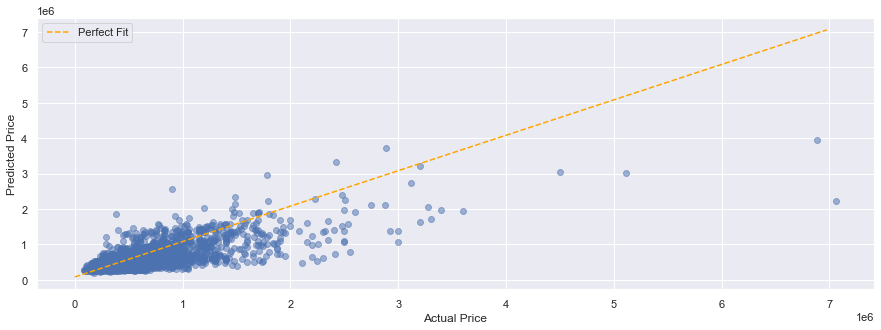

In [89]:
preds = fourth_model.predict(X_test3)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<div class="alert alert-block alert-success">
Based on our visual it looks like more than 50% of our variance actually falls UNDER our model's predicted pricing. Great if you're buying a home, good information to have if you're a seller.      
    </div>

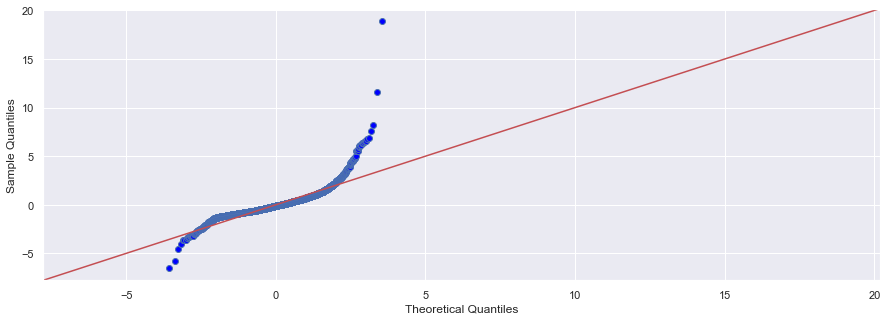

In [90]:
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

<div class="alert alert-block alert-info">
'floors' looks to be the only non-normal distribution.    
</div>

## Independence Assumption

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
pd.Series(vif, index=X_train3.columns, name="Variance Inflation Factor")

bedrooms        1.410611
bathrooms       2.087851
floors          1.376130
sqft_lot        2.025730
sqft_lot15      2.023935
10 Very Good    1.123159
11 Excellent    1.102537
12 Luxury       1.050455
13 Mansion      1.011327
AVERAGE         1.022228
EXCELLENT       1.510594
FAIR            1.008646
GOOD            1.035061
waterfront      1.481134
Name: Variance Inflation Factor, dtype: float64

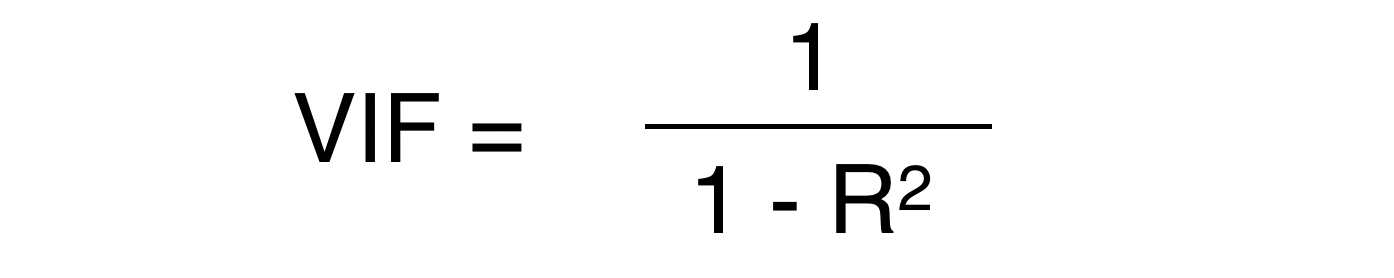

<div class="alert alert-block alert-success">
Values are well below 5.0, highly correlated. Our model shows mild multicollinearity, allowable for our purposes. 
</div>

# Predictive Model

In [92]:
df = pd.read_csv('data/kc_house_data.csv')

continuous = ['sqft_lot', 'sqft_lot15']
categoricals = ['bedrooms', 'bathrooms', 'waterfront', 'view', 'grade', 'price']

## Continuous Features

In [93]:
df_continuous = df[continuous]

#log features 
log_names = [f'{column}_log' for column in df_continuous.columns]

df_log = np.log(df_continuous)
df_log.columns = log_names

#normalize (subtract mean and divide by std)

def normalize(feature): 
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log.apply(normalize)

In [94]:
df_log_norm.head()

,sqft_lot_log,sqft_lot15_log
0,-0.388430,-0.395450
1,-0.113241,-0.024287
2,0.244475,0.042036
3,-0.523914,-0.545850
4,0.008139,-0.046394


## Categorical Features

In [95]:
# categoricals = ['bedrooms', 'bathrooms', 'waterfront_NO', 'waterfront_YES', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR'
#               ,'view_GOOD', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion']

In [96]:
df_ohe = pd.get_dummies(df[categoricals])
df_ohe.head()

,bedrooms,bathrooms,price,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,221900.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,538000.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,1.00,180000.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,3.00,604000.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3,2.00,510000.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [97]:
df_ohe1 = df_ohe[['bedrooms', 'bathrooms', 'waterfront_NO', 'waterfront_YES', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR'
               ,'view_GOOD', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion']]

In [98]:
df_ohe1.head()

,bedrooms,bathrooms,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
0,3,1.00,0,0,0,0,0,0,0,0,0,0
1,3,2.25,1,0,0,0,0,0,0,0,0,0
2,2,1.00,1,0,0,0,0,0,0,0,0,0
3,4,3.00,1,0,0,0,0,0,0,0,0,0
4,3,2.00,1,0,0,0,0,0,0,0,0,0


## Combine Features

In [99]:
preprocessed = pd.concat([df_log_norm, df_ohe1], axis = 1)
preprocessed.head()

,sqft_lot_log,sqft_lot15_log,bedrooms,bathrooms,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
0,-0.388430,-0.395450,3,1.00,0,0,0,0,0,0,0,0,0,0
1,-0.113241,-0.024287,3,2.25,1,0,0,0,0,0,0,0,0,0
2,0.244475,0.042036,2,1.00,1,0,0,0,0,0,0,0,0,0
3,-0.523914,-0.545850,4,3.00,1,0,0,0,0,0,0,0,0,0
4,0.008139,-0.046394,3,2.00,1,0,0,0,0,0,0,0,0,0


## Linear Model with price_log as target in statsmodels

In [100]:
X = preprocessed
y = df_ohe['price']

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sqft_lot_log        21597 non-null  float64
 1   sqft_lot15_log      21597 non-null  float64
 2   bedrooms            21597 non-null  int64  
 3   bathrooms           21597 non-null  float64
 4   waterfront_NO       21597 non-null  uint8  
 5   waterfront_YES      21597 non-null  uint8  
 6   view_AVERAGE        21597 non-null  uint8  
 7   view_EXCELLENT      21597 non-null  uint8  
 8   view_FAIR           21597 non-null  uint8  
 9   view_GOOD           21597 non-null  uint8  
 10  grade_10 Very Good  21597 non-null  uint8  
 11  grade_11 Excellent  21597 non-null  uint8  
 12  grade_12 Luxury     21597 non-null  uint8  
 13  grade_13 Mansion    21597 non-null  uint8  
dtypes: float64(3), int64(1), uint8(10)
memory usage: 885.9 KB


In [102]:
X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     1871.
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:00:11   Log-Likelihood:            -2.9881e+05
No. Observations:               21597   AIC:                         5.976e+05
Df Residuals:                   21582   BIC:                         5.978e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.046e+05   8311.434     12.586      0.000    8.83e+04    1.21e+05
sqft_lot_log        1.331e+04   4282.030      3.108      0.002    4917.042    2.17e+04
sqft_lot15_log     -1.769e+04   4260.789     -4.151      0.000    -2.6e+04   -9336.912
bedrooms            3.049e+04   2149.266     14.185      0.000    2.63e+04    3.47e+04
bathrooms           1.246e+05   2778.902     44.836      0.000    1.19e+05     1.3e+05
waterfront_NO       2552.3421   5375.287      0.475      0.635   -7983.617    1.31e+04
waterfront_YES      5.401e+05   2.55e+04     21.217      0.000     4.9e+05     5.9e+05
view_AVERAGE          1.6e+05   8247.262     19.400      0.000    1.44e+05    1.76e+05
view_EXCELLENT      4.167e+05   1.72e+04     24.206      0.000    3.83e+05     4.5e+05
view_FAIR           2.275e+05   1.37e+04     16.567      0.000    2.01e+05    2.54e+05
view_GOOD           2.454e+05   1.13e+04     21.787      0.000    2.23e+05    2.68e+05
grade_10 Very Good      4e+05   8032.070     49.796      0.000    3.84e+05    4.16e+05
grade_11 Excellent  7.089e+05   1.32e+04     53.763      0.000    6.83e+05    7.35e+05
grade_12 Luxury     1.254e+06    2.7e+04     46.436      0.000     1.2e+06    1.31e+06
grade_13 Mansion    2.653e+06   6.91e+04     38.402      0.000    2.52e+06    2.79e+06
==============================================================================
Omnibus:                    12022.772   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           313094.972
Skew:                           2.170   Prob(JB):                         0.00
Kurtosis:                      21.141   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
final = LinearRegression()
final.fit(X_int,y)
final.score(X_int,y)

0.5483186568985297

In [104]:
print(pd.Series(final.coef_, index=X_int.columns, name="Coefficients"))
print()
print("Intercept:", final.intercept_)

const                 0.000000e+00
sqft_lot_log          1.331014e+04
sqft_lot15_log       -1.768837e+04
bedrooms              3.048790e+04
bathrooms             1.245955e+05
waterfront_NO         2.552342e+03
waterfront_YES        5.401064e+05
view_AVERAGE          1.599976e+05
view_EXCELLENT        4.167229e+05
view_FAIR             2.275325e+05
view_GOOD             2.454346e+05
grade_10 Very Good    3.999618e+05
grade_11 Excellent    7.089250e+05
grade_12 Luxury       1.253902e+06
grade_13 Mansion      2.652976e+06
Name: Coefficients, dtype: float64

Intercept: 104608.40612494515


In [105]:
mean_squared_error(y,final.predict(X_int), squared = False)

246892.2803269205

## Run model in scikit-learn

In [106]:
linreg= LinearRegression()
linreg.fit(X,y)
linreg.coef_

array([ 1.33101363e+04, -1.76883725e+04,  3.04878953e+04,  1.24595488e+05,
        2.55234206e+03,  5.40106433e+05,  1.59997593e+05,  4.16722903e+05,
        2.27532489e+05,  2.45434558e+05,  3.99961813e+05,  7.08924991e+05,
        1.25390237e+06,  2.65297613e+06])

In [107]:
linreg.intercept_

104608.4061249448

In [108]:
categoricals.remove("price")

used_cols = [*continuous, *categoricals]
used_cols

['sqft_lot',
 'sqft_lot15',
 'bedrooms',
 'bathrooms',
 'waterfront',
 'view',
 'grade']

In [109]:
new_row = pd.DataFrame(columns=used_cols)

In [110]:
new_row = new_row.append({
'bedrooms': 4, 
'bathrooms': 4, 
'waterfront': 'NO',
'view': "NONE",
'grade': '11 Excellent',
'sqft_lot': 1500, 
'sqft_lot15': 2500}, ignore_index = True)
new_row

,sqft_lot,sqft_lot15,bedrooms,bathrooms,waterfront,view,grade
0,1500,2500,4,4,NO,NONE,11 Excellent


In [111]:
new_row_cont = new_row[continuous]

log_names = [f'{column}_log' for column in new_row_cont.columns]

new_row_log = np.log(new_row_cont.astype(float)) #function will not work unless this is a float
new_row_log.columns = log_names

#normalizing
for col in continuous: 
    #normalize using mean and std from overall dataset
    new_row_log[f'{col}_log'] = (new_row_log[f'{col}_log'] - df[col].mean()) / df[col].std()
new_row_log


,sqft_lot_log,sqft_lot15_log
0,-0.364432,-0.467487


In [112]:
categoricals = ['waterfront', 'view', 'grade']

In [113]:
new_row_cat = new_row[categoricals]

new_row_ohe = pd.DataFrame(columns = df_ohe.columns)

ohe_dict = {}
for col_type in new_row_cat.columns: 
    col_list = [c for c in new_row_ohe.columns.to_list() if col_type in c]
    for x in col_list: 
        if new_row_cat[col_type][0] in x: 
            ohe_dict[x] = 1
        else: 
            ohe_dict[x] = 0
new_row_ohe = new_row_ohe.append(ohe_dict, ignore_index=True)
new_row_ohe

,bedrooms,bathrooms,price,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
df_ohe2 = new_row_ohe[['bedrooms', 'bathrooms', 'waterfront_NO', 'waterfront_YES', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR'
               ,'view_GOOD', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion']]

In [115]:
df_ohe2.head()

,bedrooms,bathrooms,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [116]:
new_row_processed = pd.concat([new_row_log, df_ohe2], axis = 1)
new_row_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sqft_lot_log        1 non-null      float64
 1   sqft_lot15_log      1 non-null      float64
 2   bedrooms            0 non-null      float64
 3   bathrooms           0 non-null      float64
 4   waterfront_NO       1 non-null      float64
 5   waterfront_YES      1 non-null      float64
 6   view_AVERAGE        1 non-null      float64
 7   view_EXCELLENT      1 non-null      float64
 8   view_FAIR           1 non-null      float64
 9   view_GOOD           1 non-null      float64
 10  grade_10 Very Good  1 non-null      float64
 11  grade_11 Excellent  1 non-null      float64
 12  grade_12 Luxury     1 non-null      float64
 13  grade_13 Mansion    1 non-null      float64
dtypes: float64(14)
memory usage: 240.0 bytes


In [117]:
new_row_processed['bedrooms'] = 4

In [118]:
new_row_processed['bathrooms'] = 4

In [119]:
new_row_processed

,sqft_lot_log,sqft_lot15_log,bedrooms,bathrooms,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
0,-0.364432,-0.467487,4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [120]:
new_row_pred_log = linreg.predict(new_row_processed)
new_row_pred_log

array([1439837.72357711])

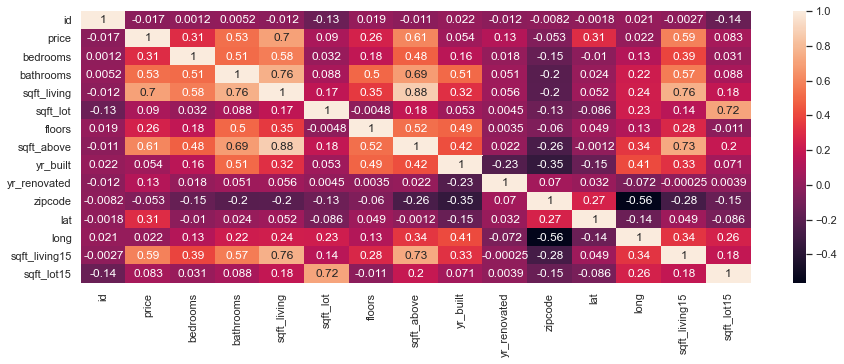

In [121]:
sns.set(rc = {'figure.figsize': (15,5)})
sns.heatmap(af, annot = True);

# Conclusion

<div class="alert alert-block alert-info">
Our first model was run on just the raw data in the King County housing dataset. This was meant to give us a snapshot of features that we may want to focus on, I included a heatmap and .corr function at the beginning of the project to give us better insight into what contributes to the price of a home. Unfortunately our second model cut out all non-numeric values and gave us our worst predictive model. 

After the failure of our secondary model we were able to break down our categorical columns, grade, condition, view, and waterfront. The first three we settled as arrays of the various categories, the waterfront data we were able to create boolean values. 
    
Our fourth model utilized standard scaling across the entirety of the dataset. We pulled our information on cost of features from this model. 
    
    
* Though this final model is not the best in regards to R-squared score, it includes the least amount of multicollinearity, giving us a clearer picture regarding what features contribute to the price of a home. 
    
    
    
</div>    